# NumPy: Entrada/Salida

Por E/S (I/O en inglés) entendemos leer y escribir datos archivos. Es algo que necesitamos con relativa frecuencia, y en NumPy es muy sencillo de hacer. Para el caso de la **lectura** se usa la función `np.loadtxt`.

## Ejemplo datos calidad del aire 

In [1]:
# Linux command 
!head ../data/barrio_del_pilar-20160322.csv

# Windows
#!type ..\data\barrio_del_pilar-20160322.csv

﻿Estación: Barrio del Pilar;;;;
Fecha;Hora;CO;NO2;O3
;;mg/m³;µg/m³;µg/m³
22/03/2016;01:00;0.2;14;73
22/03/2016;02:00;0.2;10;77
22/03/2016;03:00;0.2;9;75
22/03/2016;04:00;0.2;3;81
22/03/2016;05:00;0.2;3;81
22/03/2016;06:00;0.2;6;79
22/03/2016;07:00;0.2;24;59


En primer lugar, importamos las librerías que vamos a usar: Numpy y Matplotlib. También usaremos `plt.ion()` para activar el modo interactivo de matplotlib.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.ion()

### Cargando los datos

Usaremos la función `loadtxt` para cargar los datos en un array. Usaremos los argumentos opcionales `skiprows`, `delimiter` y `usecols` para captar los datos que queremos.

In [4]:
# loading the data:
# ./data/barrio_del_pilar-20160322.csv
data1 = np.loadtxt('../data/barrio_del_pilar-20160322.csv', skiprows=3, delimiter=';', usecols=(2,3,4))
data1[:10,:]

array([[ 0.2, 14. , 73. ],
       [ 0.2, 10. , 77. ],
       [ 0.2,  9. , 75. ],
       [ 0.2,  3. , 81. ],
       [ 0.2,  3. , 81. ],
       [ 0.2,  6. , 79. ],
       [ 0.2, 24. , 59. ],
       [ 0.3, 48. , 37. ],
       [ 0.3, 40. , 43. ],
       [ 0.3, 41. , 44. ]])

### Valores inexistentes

El archivo que contiene los datos de 2015 tiene algunos agujeros por errores de medida. Como alternativa a `loadtxt`, podremos usar la función `genfromtxt`, teniendo en cuenta que ahora el argumento opcional de saltar líneas pasa a llamarse `skip_header`.

In [8]:
#Loading the data 2:
#../data/barrio_del_pilar-20151222.csv
data2 = np.genfromtxt('../data/barrio_del_pilar-20151222.csv', skip_header=3, delimiter=';', usecols=(2,3,4))
data2[:10,:]
print(data2)

[[5.00e-01 6.50e+01 7.00e+00]
 [4.00e-01 5.00e+01 7.00e+00]
 [3.00e-01 3.70e+01 1.10e+01]
 [3.00e-01 3.70e+01 1.00e+01]
 [3.00e-01 2.90e+01 1.70e+01]
 [3.00e-01 3.60e+01 1.30e+01]
 [3.00e-01 4.70e+01 7.00e+00]
 [4.00e-01 5.70e+01 6.00e+00]
 [5.00e-01 6.70e+01 6.00e+00]
 [5.00e-01 6.90e+01 8.00e+00]
 [5.00e-01 6.70e+01 1.10e+01]
 [5.00e-01 6.40e+01 1.50e+01]
 [5.00e-01 6.50e+01 2.10e+01]
 [5.00e-01 6.80e+01 2.40e+01]
 [7.00e-01 9.10e+01 1.90e+01]
 [8.00e-01 1.05e+02 1.30e+01]
 [8.00e-01 1.02e+02 1.00e+01]
 [7.00e-01 1.00e+02 8.00e+00]
 [1.50e+00 1.48e+02 7.00e+00]
 [2.70e+00 2.23e+02 7.00e+00]
 [2.00e+00 2.04e+02 7.00e+00]
 [3.30e+00 2.51e+02 7.00e+00]
 [3.00e+00 2.64e+02 7.00e+00]
 [2.00e+00 2.04e+02 7.00e+00]
 [1.20e+00 1.27e+02 6.00e+00]
 [4.00e-01 6.10e+01 7.00e+00]
 [3.00e-01 4.60e+01 9.00e+00]
 [3.00e-01 4.70e+01 7.00e+00]
 [5.00e-01 4.40e+01 6.00e+00]
 [5.00e-01 4.50e+01 6.00e+00]
 [5.00e-01 4.60e+01 6.00e+00]
 [4.00e-01 5.30e+01 6.00e+00]
 [5.00e-01 6.90e+01 6.00e+00]
 [9.00e-01

Podemos comprobar como afecta la existencia de estos valores a algunas funciones de Numpy, como `np.mean`. A veces es posible esquivar estos problemas con otras funciones como `np.nanmean`.

In [7]:
np.mean(data2, axis=0)

array([nan, nan, nan])

In [48]:
np.nanmean(data2, axis=0)

array([ 0.64179894, 67.57671958, 17.3       ])

Probemos calcular la diferencia entre ambos años:

In [10]:
data_dif = data1 - data2
data_dif[:10,:]

array([[ -0.3, -51. ,  66. ],
       [ -0.2, -40. ,  70. ],
       [ -0.1, -28. ,  64. ],
       [ -0.1, -34. ,  71. ],
       [ -0.1, -26. ,  64. ],
       [ -0.1, -30. ,  66. ],
       [ -0.1, -23. ,  52. ],
       [ -0.1,  -9. ,  31. ],
       [ -0.2, -27. ,  37. ],
       [ -0.2, -28. ,  36. ]])

### Guardar los datos nuevos

Supongamos que ahora queremos guardar nuestra tabla de datos en un archivo txt, para poder cargarlo ya modificado más adelante. Una manera fácil de hacerlo sería con otra función de NumPy: `np.savetxt`. Lo usaremos con los argumentos opcionales `fmt='%9.3f', newline = '\r\n'` para obtener un archivo ordenado que podamos entender de un vistazo.

In [11]:
np.savetxt('../data/diferencia_interanual.txt', data_dif, fmt='%9.3f', newline = '\r\n')

### Graficando los datos

* NO2
    - Media anual: 40 µg/m3
    - Media horaria: 200 µg/m3

(0, 220)

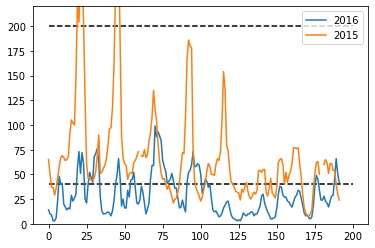

In [12]:
plt.plot(data1[:, 1], label='2016')
plt.plot(data2[:, 1], label='2015')

plt.legend()

plt.hlines(200, 0, 200, linestyles='--')
plt.hlines(40, 0, 200, linestyles='--')
plt.ylim(0, 220)

## ¿Cómo leeríamos un archivo sin usar NumPy?

In [52]:
data_file = '../data/barrio_del_pilar-20151222.csv'

In [53]:
data = []

with open(data_file) as f:
    # Saltamos las tres primeras líneas
    for ii in range(3):
        f.readline()
    
    for line in f:
        line_string = line
        line_list = line.split(';')
        
        date = line_list[0]
        hour = line_list[1]
        
        components_data = []
        for c in line_list[2:]:
            if '-' not in c:
                components_data.append(float(c))
            else:
                components_data.append(np.nan)
        data.append(components_data)
        
print(np.array(data))    

[[5.00e-01 6.50e+01 7.00e+00]
 [4.00e-01 5.00e+01 7.00e+00]
 [3.00e-01 3.70e+01 1.10e+01]
 [3.00e-01 3.70e+01 1.00e+01]
 [3.00e-01 2.90e+01 1.70e+01]
 [3.00e-01 3.60e+01 1.30e+01]
 [3.00e-01 4.70e+01 7.00e+00]
 [4.00e-01 5.70e+01 6.00e+00]
 [5.00e-01 6.70e+01 6.00e+00]
 [5.00e-01 6.90e+01 8.00e+00]
 [5.00e-01 6.70e+01 1.10e+01]
 [5.00e-01 6.40e+01 1.50e+01]
 [5.00e-01 6.50e+01 2.10e+01]
 [5.00e-01 6.80e+01 2.40e+01]
 [7.00e-01 9.10e+01 1.90e+01]
 [8.00e-01 1.05e+02 1.30e+01]
 [8.00e-01 1.02e+02 1.00e+01]
 [7.00e-01 1.00e+02 8.00e+00]
 [1.50e+00 1.48e+02 7.00e+00]
 [2.70e+00 2.23e+02 7.00e+00]
 [2.00e+00 2.04e+02 7.00e+00]
 [3.30e+00 2.51e+02 7.00e+00]
 [3.00e+00 2.64e+02 7.00e+00]
 [2.00e+00 2.04e+02 7.00e+00]
 [1.20e+00 1.27e+02 6.00e+00]
 [4.00e-01 6.10e+01 7.00e+00]
 [3.00e-01 4.60e+01 9.00e+00]
 [3.00e-01 4.70e+01 7.00e+00]
 [5.00e-01 4.40e+01 6.00e+00]
 [5.00e-01 4.50e+01 6.00e+00]
 [5.00e-01 4.60e+01 6.00e+00]
 [4.00e-01 5.30e+01 6.00e+00]
 [5.00e-01 6.90e+01 6.00e+00]
 [9.00e-01

---

Si procuramos saber más sobre lectura y escritura de archivos en Python, podemos consultar la documentación oficial:

https://docs.python.org/3.6/tutorial/inputoutput.html#reading-and-writing-files

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())